# EE 511 Project 4 Report


This is an all-in-one report to EE 511 Project 4, where the explanations, discussions and codes are included.

All experiments are run in Python code.

Import the libs we need in this project.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from scipy.special import comb
from numpy.random import rand
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
pi = np.pi
%matplotlib inline

## Exp.1 [Pi-Estimation]
--------------------------------------------


Generate samples given # of sample = 100, 300, 500, 1000 respectively

In [2]:
n = np.array([100,300,500,1000])
k = 50
Samples = []
Pi = np.zeros([k,4])
for i in range(n.shape[0]):
    Samples.append(np.zeros([k,n[i],2]))
    for kk in range(k):
        for j in range(n[i]):
            Samples[i][kk,j,:] = rand(1,2)
        Pi[kk,i] = np.sum(np.count_nonzero\
                          (np.sum(Samples[i][kk,:,:]**2,1) <= 1)) / n[i] * 4


The estimator to $\pi$ is ${4{\bar{X}}_{n}}=\frac{1}{n}\sum\limits_{i=1}^{n}{{{X}_{i}}}$, where ${X}_{i}$ is $Bernoulli(\pi/4)$. Thus, ${\mu}_{X}=\pi$, $\sigma _{X}^{2}=\frac{p\left( 1-p \right)}{n}=\frac{\pi \left( 4-\pi  \right)}{n}$.

Plot the histogram when `n=100`. The average should be around `Pi≈3.14` and the variance should be around `Pi(4-Pi)/100≈0.027`

Text(0.5,1,'Estimated Pi given 100 samples')

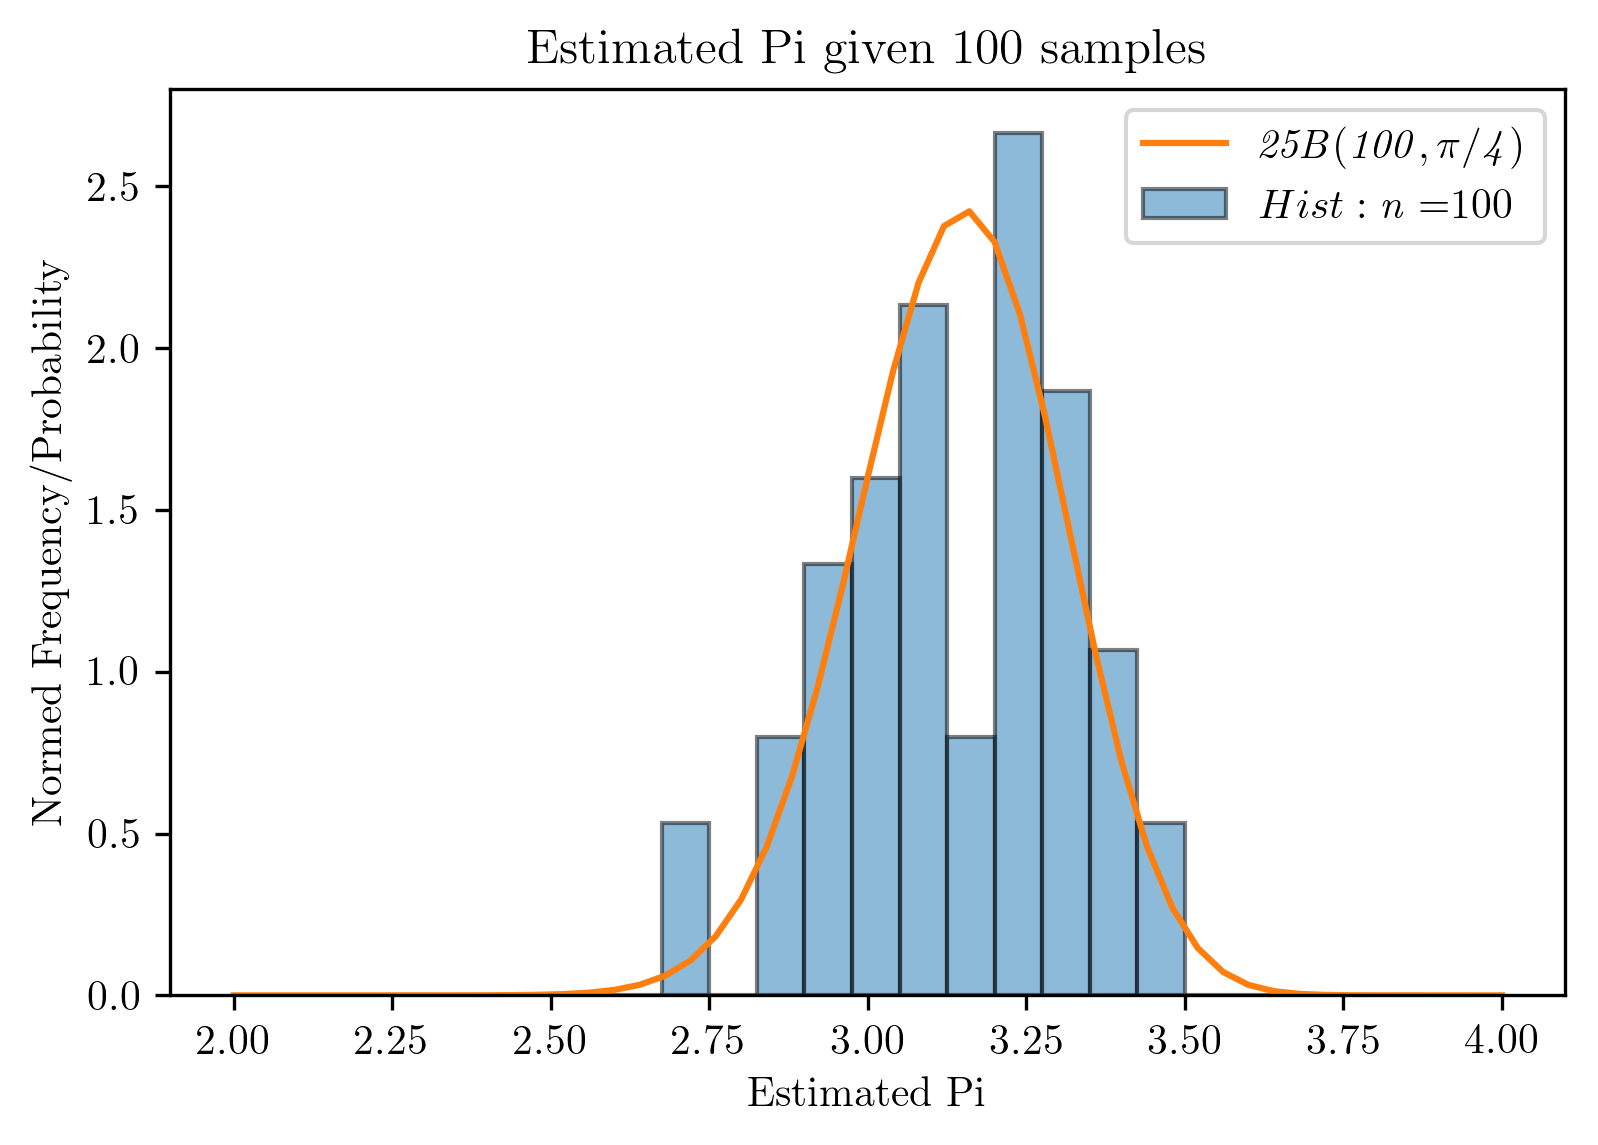

In [3]:
from scipy.stats import binom

plt.figure(dpi = 300)
plt.hist(Pi[:,0],bins = np.arange(-1,1,0.075)+3,rwidth = 1, edgecolor = 'black', \
         alpha = 0.5, label = '$Hist:\mathit{n=}100$',density = True) 
plt.plot(np.arange(50,101)/25,binom.pmf(np.arange(50,101), n[0], np.pi/4)*n[0]/4,label = '$\mathit{25B(100,\pi/4)}$')
plt.legend(loc='upper right')
plt.ylabel('Normed Frequency/Probability')
plt.xlabel('Estimated Pi')
plt.title('Estimated Pi given 100 samples')

In [4]:
print("Average =",np.mean(Pi[:,0]))
print("Variance = ",np.std(Pi[:,0])**2)

Average = 3.1344
Variance =  0.03198464


As the number of samples gets larger, the average should remain the same while the vatriance should get smaller.

We see that as the following histogram.

Text(0.5,1,'Estimated Pi given 300,500,1000 samples')

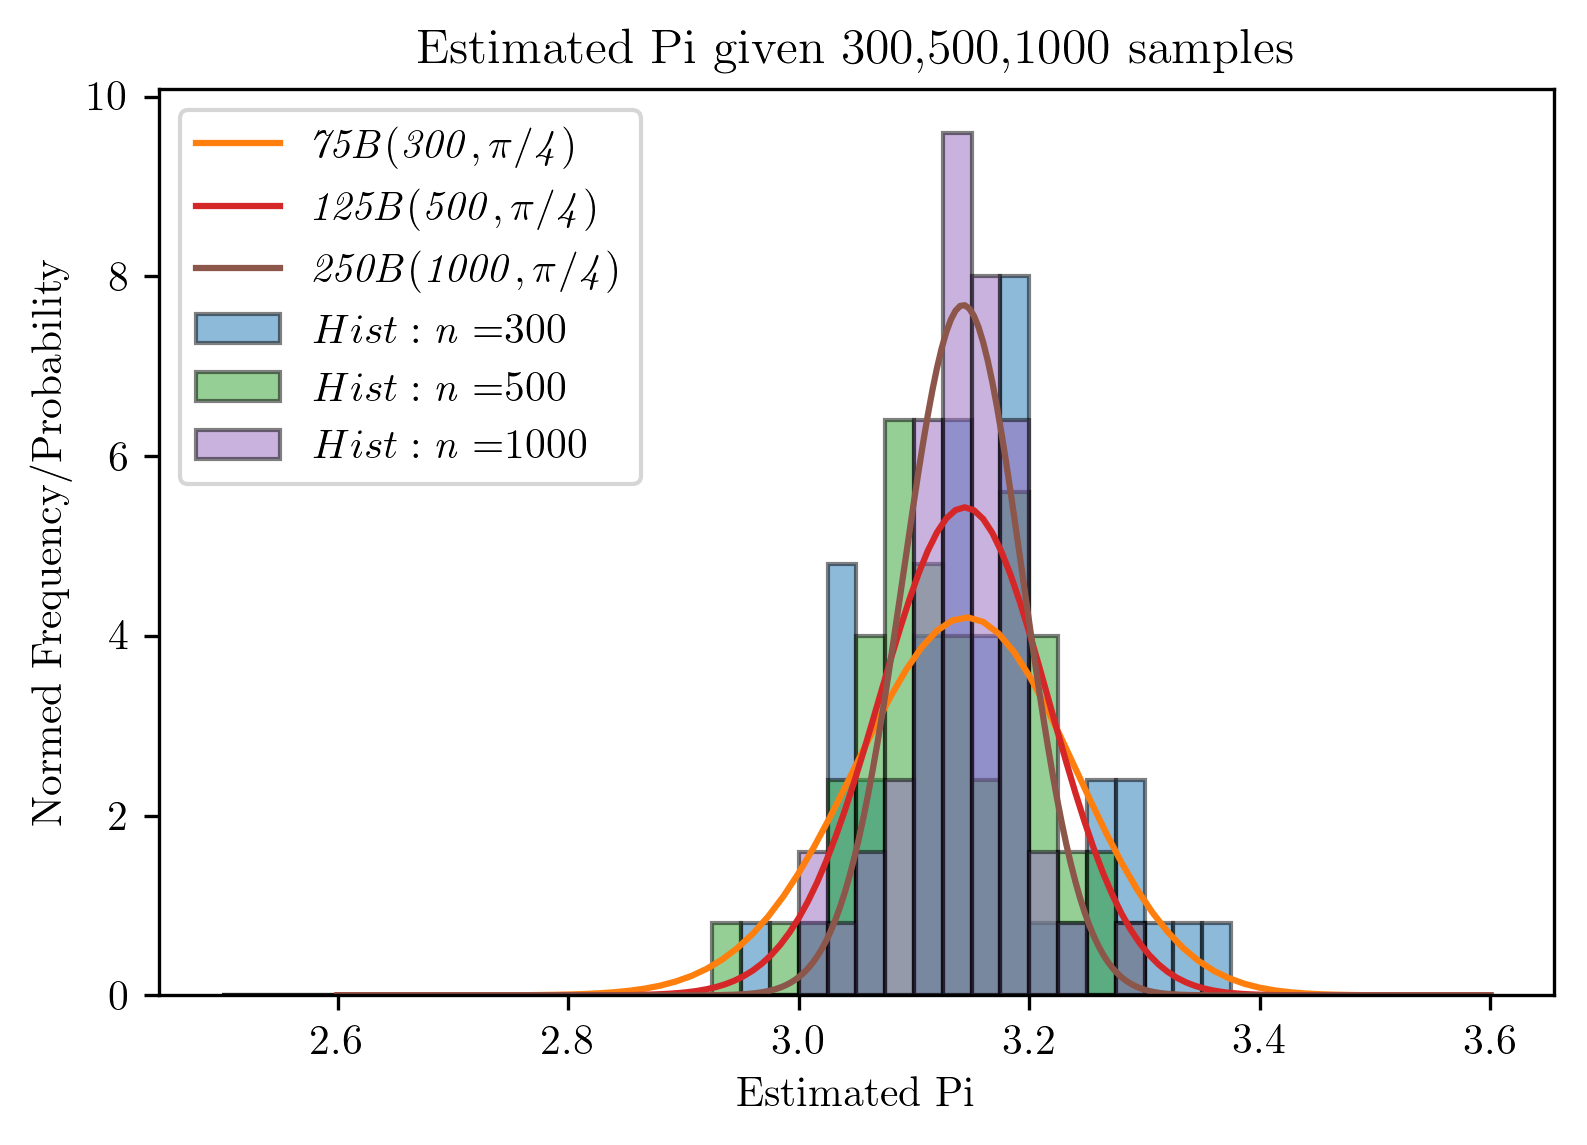

In [5]:
plt.figure(dpi = 300)

plt.hist(Pi[:,1],bins = np.arange(-0.5,0.5,0.025)+3,rwidth = 1, edgecolor = 'black', \
        alpha = 0.5, label = '$Hist:\mathit{n=}300$',density = True) 
plt.plot(np.arange(n[1]*6.5/10,n[1]*9/10+1)/(n[1]/4),binom.pmf(np.arange(n[1]*6.5/10,n[1]*9/10+1), n[1], np.pi/4)*n[1]/4,label = '$\mathit{75B(300,\pi/4)}$')

plt.hist(Pi[:,2],bins = np.arange(-0.5,0.5,0.025)+3,rwidth = 1, edgecolor = 'black', \
        alpha = 0.5, label = '$Hist:\mathit{n=}500$',density = True) 
plt.plot(np.arange(n[2]*6.5/10,n[2]*9/10+1)/(n[2]/4),binom.pmf(np.arange(n[2]*6.5/10,n[2]*9/10+1), n[2], np.pi/4)*n[2]/4,label = '$\mathit{125B(500,\pi/4)}$')

plt.hist(Pi[:,3],bins = np.arange(-0.5,0.5,0.025)+3,rwidth = 1, edgecolor = 'black', \
        alpha = 0.5, label = '$Hist:\mathit{n=}1000$',density = True) 
plt.plot(np.arange(n[3]*6.5/10,n[3]*9/10+1)/(n[3]/4),binom.pmf(np.arange(n[3]*6.5/10,n[3]*9/10+1), n[3], np.pi/4)*n[3]/4,label = '$\mathit{250B(1000,\pi/4)}$')


plt.legend(loc='upper left')
plt.ylabel('Normed Frequency/Probability')
plt.xlabel('Estimated Pi')
plt.title('Estimated Pi given 300,500,1000 samples')

In [7]:
print("Average =",np.mean(Pi[:,1]),np.mean(Pi[:,2]),np.mean(Pi[:,3]),"given n = 300, 500, 100 respectively.")
print("Variance = ",np.std(Pi[:,1])**2,np.std(Pi[:,2])**2,np.std(Pi[:,3])**2,"given n = 300, 500, 100 respectively.")

Average = 3.15813333333 3.13312 3.14112  given n = 300, 500, 100 respectively.
Variance =  0.00813518222222 0.0055853056 0.0027552256  given n = 300, 500, 100 respectively.


## Exp.2 [Monte Carlo Integration and Variance Reduction Strategies]
--------------------------------------------

Define the two functions.

In [6]:
def f1(x):
    return 1/(1+np.sinh(2*x)*np.log(x))

def f2(x,y):
    return np.exp(-x**4-y**4);

Calculate the exact integrals for evaluation.

In [8]:
from scipy import integrate
I1,err1=integrate.quad(f1,0.8,3)
I2,err2=integrate.dblquad(f2,-np.pi,np.pi,lambda x:-np.pi,lambda x:np.pi)
print(I1)
print(I2)

0.6095525763773304
3.2862618016493594


### Monte Carlo Integration

The Monte Carlo Integration estimator to one-variable function `f(x)` is

$$\widehat{I}=\frac{b-a}{n}\sum\limits_{i=1}^{n}{f\left( {{x}_{i}} \right)}$$

where `b-a` is the integral domain.

The Monte Carlo Integral estimator to two-variable function `f(x,y)` is

$$\widehat{I}=\frac{S}{n}\sum\limits_{i=1}^{n}{f\left( {{x}_{i}},{{y}_{i}} \right)}$$

where `S` is the integral domain.


For function ${{e}^{-{{x}^{4}}-{{y}^{4}}}}$, `S=4pi^2`.

In [9]:
n2 = 1000
k2 = 50 
Samples2 = np.zeros([k2,n2,2])
Integral2 = np.zeros([k2,2])

for kk in range(k2):
    for i in range(n2):
        t = rand(1)*(3-0.8)+0.8
        Samples2[kk,i,0] = f1(t)
        xy = rand(1,2)*np.pi
        Samples2[kk,i,1] = f2(xy[0,0],xy[0,1])
    Integral2[kk,0] = np.mean(Samples2[kk,:,0]) * (3-0.8)
    Integral2[kk,1] = np.mean(Samples2[kk,:,1]) * (4*np.pi**2)


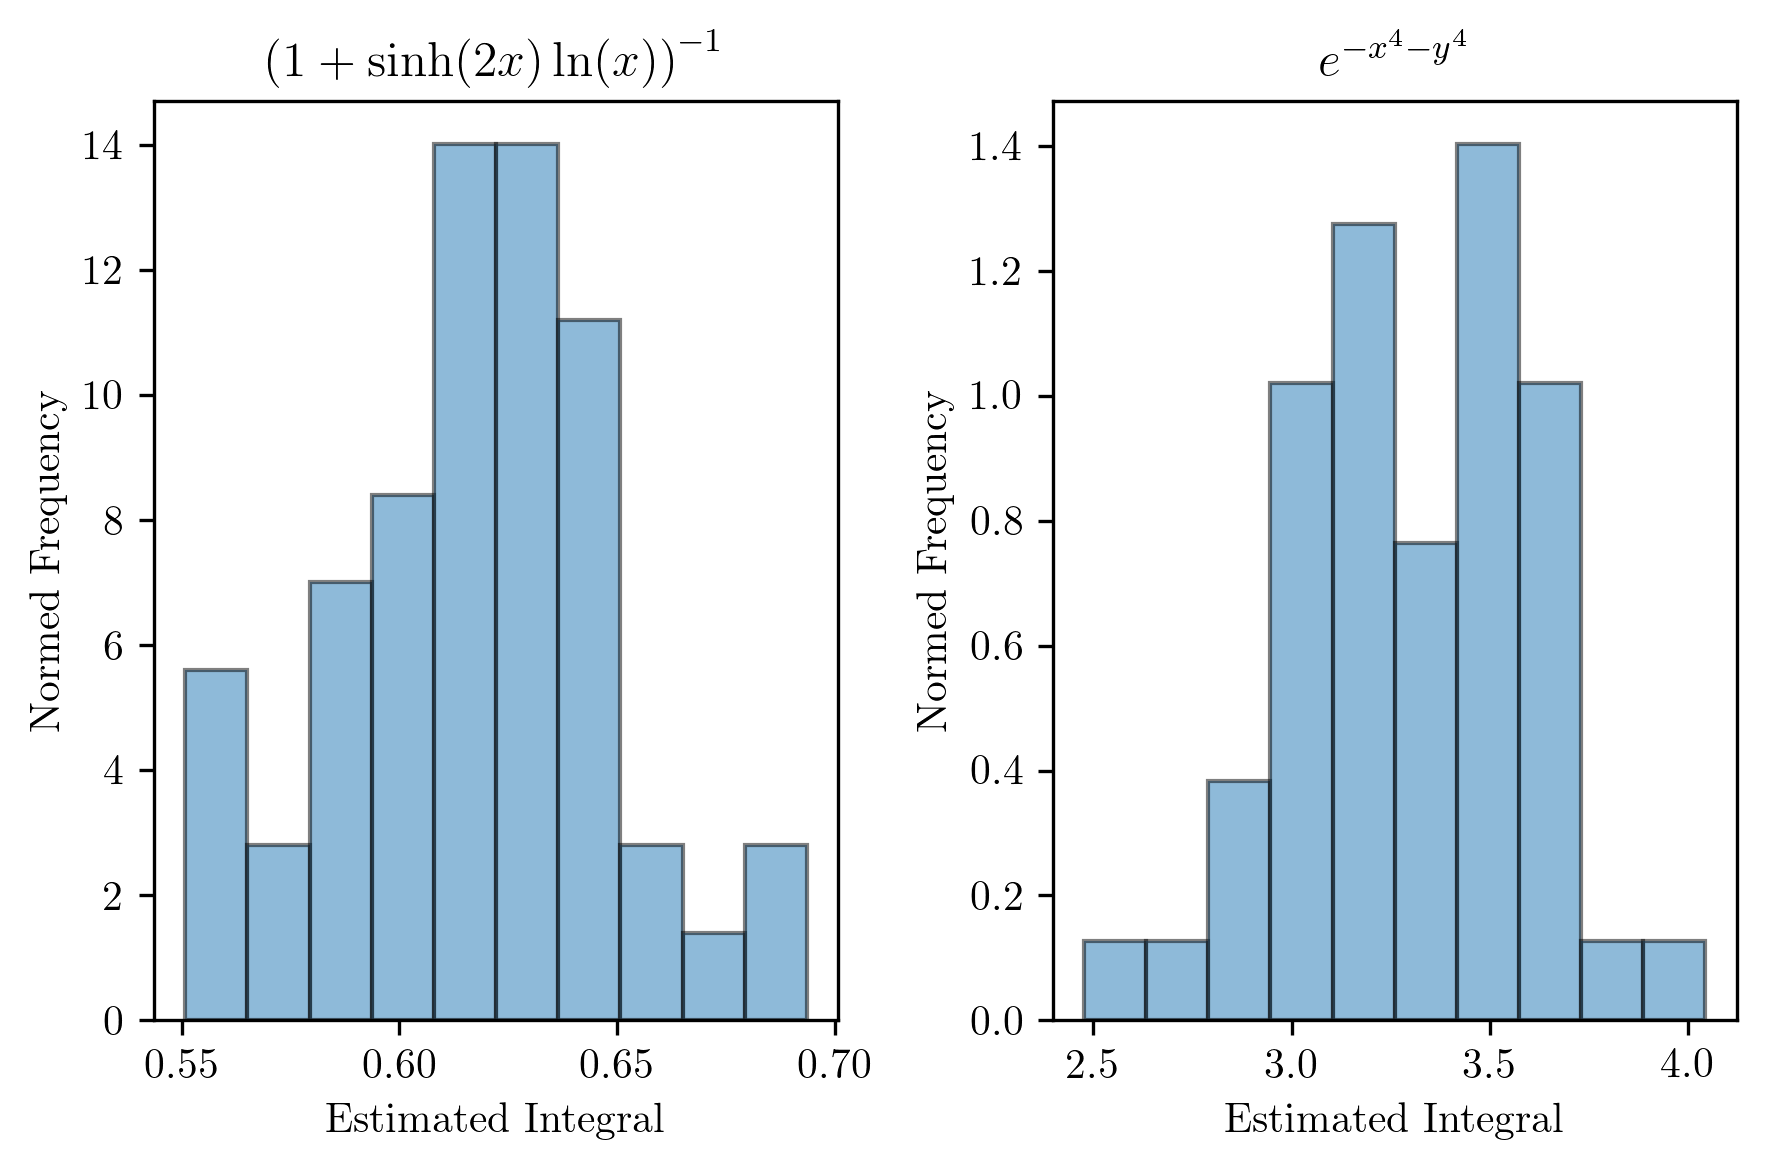

In [10]:
plt.figure(dpi=300)

plt.subplot(121)
plt.hist(Integral2[:,0],rwidth = 1, edgecolor = 'black', \
        alpha = 0.5, label = '$Hist:\mathit{n=}300$',density = True) 
plt.ylabel('Normed Frequency')
plt.xlabel('Estimated Integral')
plt.title('${(1+\sinh(2x)\ln(x))}^{-1}$')

plt.subplot(122)
plt.hist(Integral2[:,1],rwidth = 1, edgecolor = 'black', \
        alpha = 0.5, label = '$Hist:\mathit{n=}300$',density = True) 
plt.ylabel('Normed Frequency')
plt.xlabel('Estimated Integral')
plt.title('${e}^{-x^4-y^4}$')

plt.tight_layout()


In [11]:
print('Estimation of f1 is', np.mean(Integral2[:,0]))
print('Estimation of f2 is', np.mean(Integral2[:,1]))

Estimation of f1 is 0.617485199492
Estimation of f2 is 3.31218837579


### Stratification Sampling Integration

The basic idea of stratification sampling integration is sampling more points from the high-variant area while sampling fewer points from the low-variant area, that is:

$$\widehat{I}=\sum\limits_{i=1}^{k}{\left( \frac{{{D}_{i}}}{{{n}_{i}}}\sum\limits_{j=1}^{{{n}_{i}}}{f\left( {{x}_{ij}} \right)} \right)}$$

Visualize the curve (surface) of `f1` and `f2`.

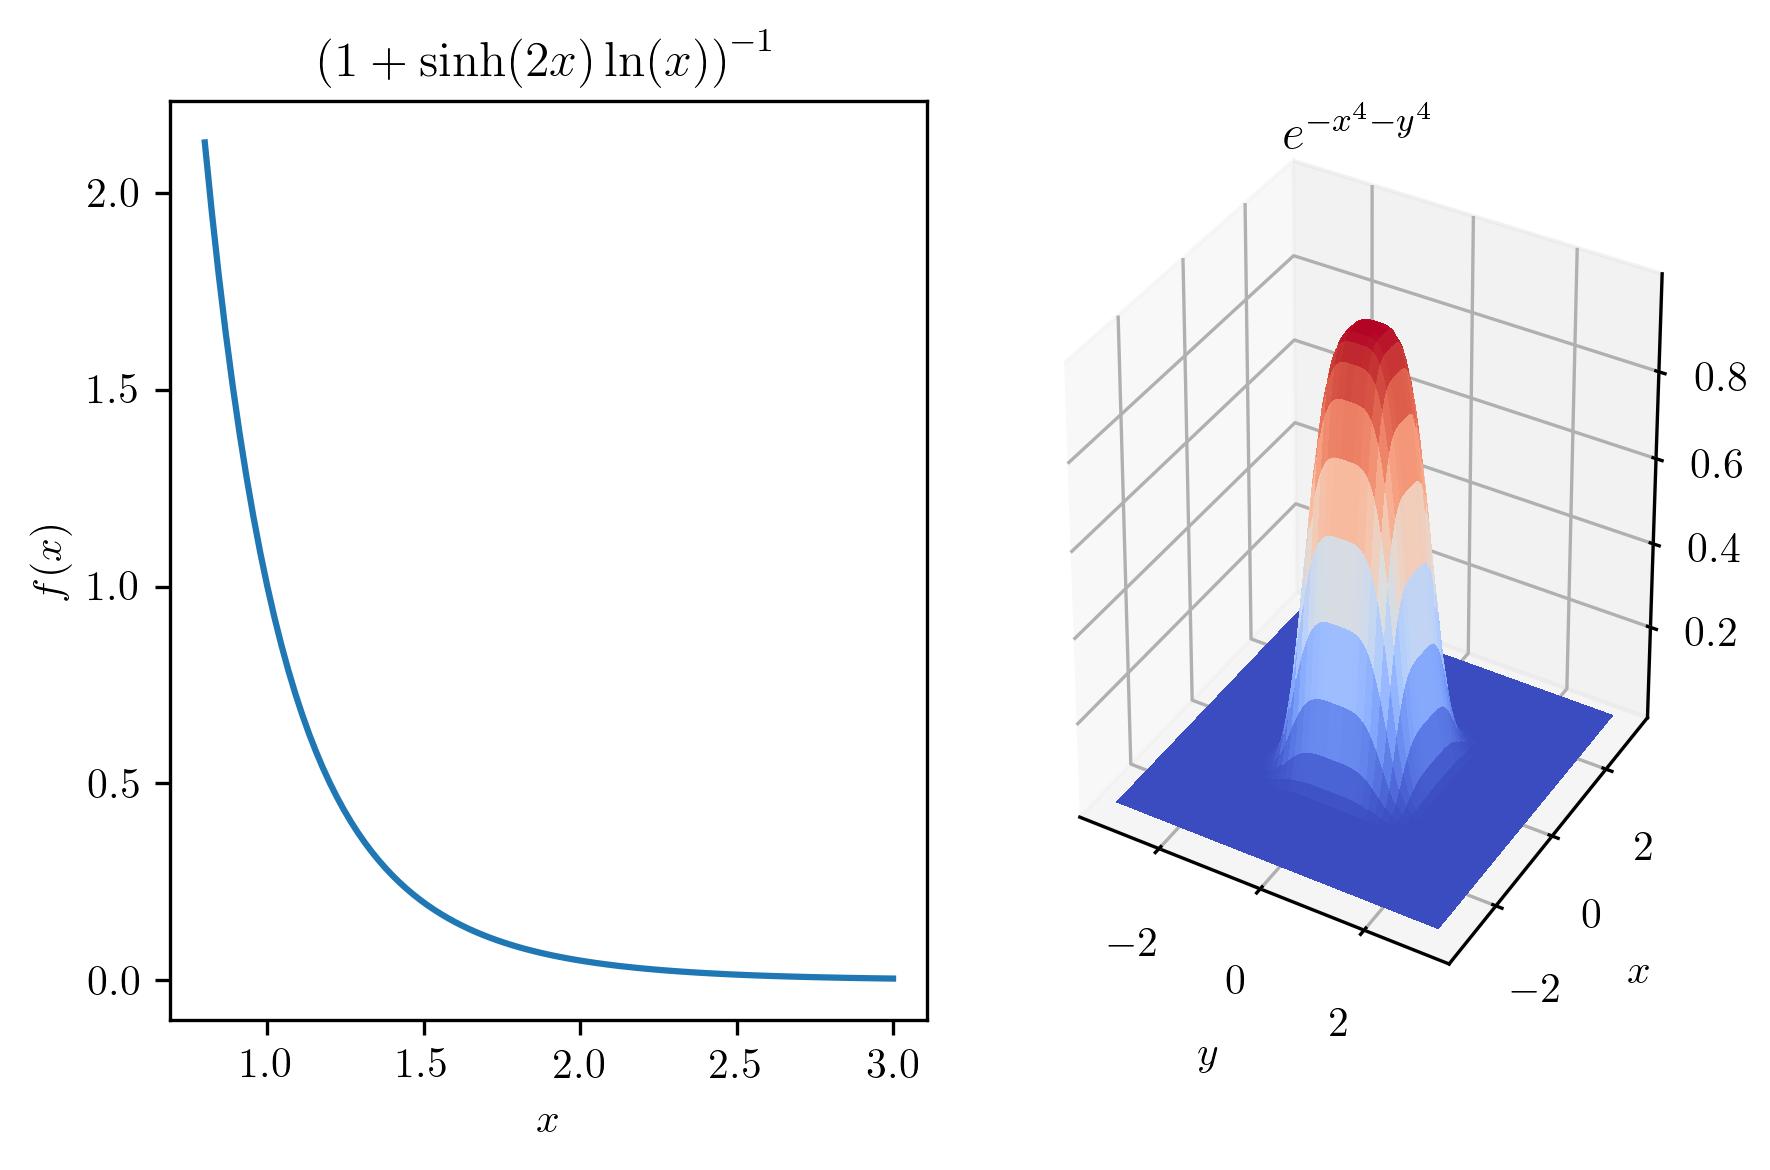

In [14]:
fig = plt.figure(dpi=300)

fig.add_subplot(121)
x = np.linspace(0.8,3,100)
plt.plot(x,f1(x))
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('${(1+\sinh(2x)\ln(x))}^{-1}$')

ax = fig.add_subplot(122, projection='3d')
X, Y = np.meshgrid(np.linspace(-np.pi,np.pi,100), np.linspace(-np.pi,np.pi,100))
Z = f2(X,Y)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.ylabel('$x$')
plt.xlabel('$y$')
plt.title('${e}^{-x^4-y^4}$')

plt.tight_layout()


Divide `f1` into such three ranges: `[0.8,1.5]`, `[1.5,25]`, `[2.5,3.0]`.

Divide `f2` into such three ranges: `x and y in [0,0.5]`, `x or y in [0.5,1.25]`, `x or y in [1.25,pi]`

Note there is a subtle trick when UNIFORMLY sampling on `x or y in [0.5,1.25]` or `x or y in [1.25,pi]`.

In [15]:
#stratification Sampling
# 
n3 = [np.array([600,300,100]),np.array([300,600,100])]
x3 = [np.array([[0.8,1.5],[1.5,2.5],[2.5,3.0]]),np.array([[0,0.5],[0.5,1.25],[1.25,np.pi]])]
k3 = 50 
Samples3 = np.zeros([k3,n2,2])
Integral3 = np.zeros([k3,2])


for kk in range(k3):
    for Id,ni in enumerate(n3[0]):
        Xmin = x3[0][Id,0]
        Xmax = x3[0][Id,1]
        for _ in range(ni):
            x = rand(1)*(Xmax-Xmin)+Xmin
            Integral3[kk,0] += 1/ni * f1(x)*(Xmax-Xmin)

for kk in range(k3):
    for Id,ni in enumerate(n3[1]):
        Xmin = x3[1][Id,0]
        Xmax = x3[1][Id,1]
        for _ in range(ni):
            x = rand(1)*(Xmax)
            if x <= Xmin:
                y = rand(1)*(Xmax-Xmin)+Xmin
            else:
                y = rand(1)*(Xmax)
            if x <= Xmin:
                Integral3[kk,1] += 1/ni * f2(x,y)*\
                        (Xmax**2-Xmin**2)*4 *(Xmax)/(Xmax+Xmin)
            else:
                Integral3[kk,1] += 1/ni * f2(x,y)*\
                        (Xmax**2-Xmin**2)*4 * (Xmax**2)/(Xmax**2-Xmin**2)
                

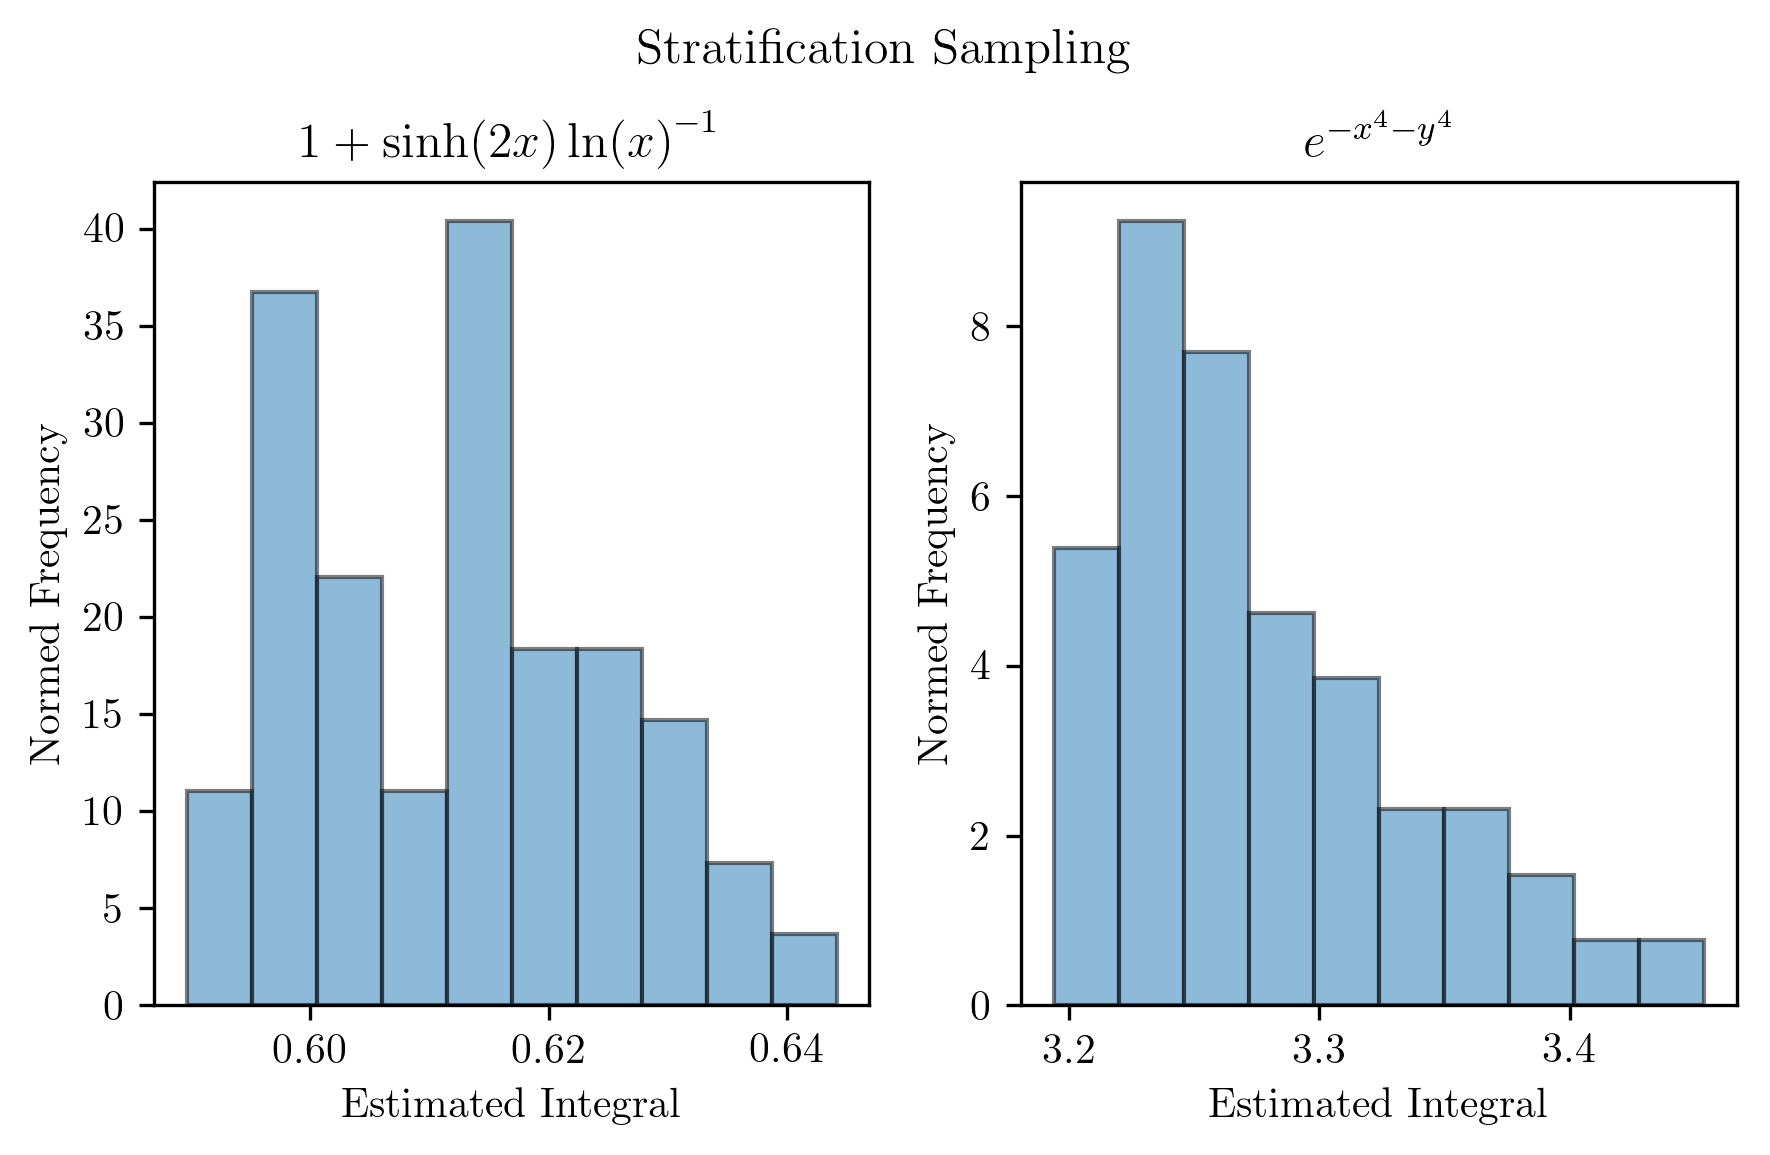

In [16]:
plt.figure(dpi=300)
plt.suptitle('Stratification Sampling')

plt.subplot(121)
plt.hist(Integral3[:,0],rwidth = 1, edgecolor = 'black', \
        alpha = 0.5, label = '$Hist:\mathit{n=}300$',density = True) 
plt.ylabel('Normed Frequency')
plt.xlabel('Estimated Integral')
plt.title('${1+\sinh(2x)\ln(x)}^{-1}$')

plt.subplot(122)
plt.hist(Integral3[:,1],rwidth = 1, edgecolor = 'black', \
        alpha = 0.5, label = '$Hist:\mathit{n=}300$',density = True) 
plt.ylabel('Normed Frequency')
plt.xlabel('Estimated Integral')
plt.title('${e}^{-x^4-y^4}$')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [17]:
print('Estimation of f1 is', np.mean(Integral3[:,0]))
print('Estimation of f2 is', np.mean(Integral3[:,1]))

Estimation of f1 is 0.612142578408
Estimation of f2 is 3.27591749481


### Importance Sampling Integration

The idea of importance sampling: draw the sample from a proposal distribution and re-weight the integral using importance weights so that the correct distribution is targeted. That is:

$$\widehat{I}=\frac{1}{n}\sum\limits_{i=1}^{n}{\frac{f\left( {{y}_{i}} \right)}{g\left( {{y}_{i}} \right)}}$$

`g(y)` is the PDF of random variable `Y`, ans it has higher value where `f(y)` varies drastically, lower value where `f(y)` is more stable.

Here we choose `g1(y)=1/ln(23)*(x-0.7)` for `f1`, 2-D Normal with `mean=[0,0],variance = [[0.5,0],[0,0.5]]` for `f2`.

In [18]:
from scipy.stats import multivariate_normal

def h1(x):
    return 1/np.log(23)/(x-0.7)

def h2(x,y):
    return multivariate_normal.pdf(np.array([x,y]),mean = np.zeros([2,]),cov = 0.5*np.identity(2))

def s1():
    return np.exp(rand(1)*np.log(23)-np.log(10))+0.7

def s2():
    return np.random.multivariate_normal(np.zeros([2,]), 0.5*np.identity(2), 1)

In [19]:
n4 = 1000
k4 = 50 
Samples4 = np.zeros([k2,n2,2])
Integral4 = np.zeros([k2,2])

for kk in range(k4):
    for i in range(n4):
        t = s1()
        Samples4[kk,i,0] = f1(t)/h1(t)
        xy = s2()
        Samples4[kk,i,1] = f2(xy[0,0],xy[0,1]) / h2(xy[0,0],xy[0,1])
    Integral4[kk,0] = np.mean(Samples4[kk,:,0]) 
    Integral4[kk,1] = np.mean(Samples4[kk,:,1])

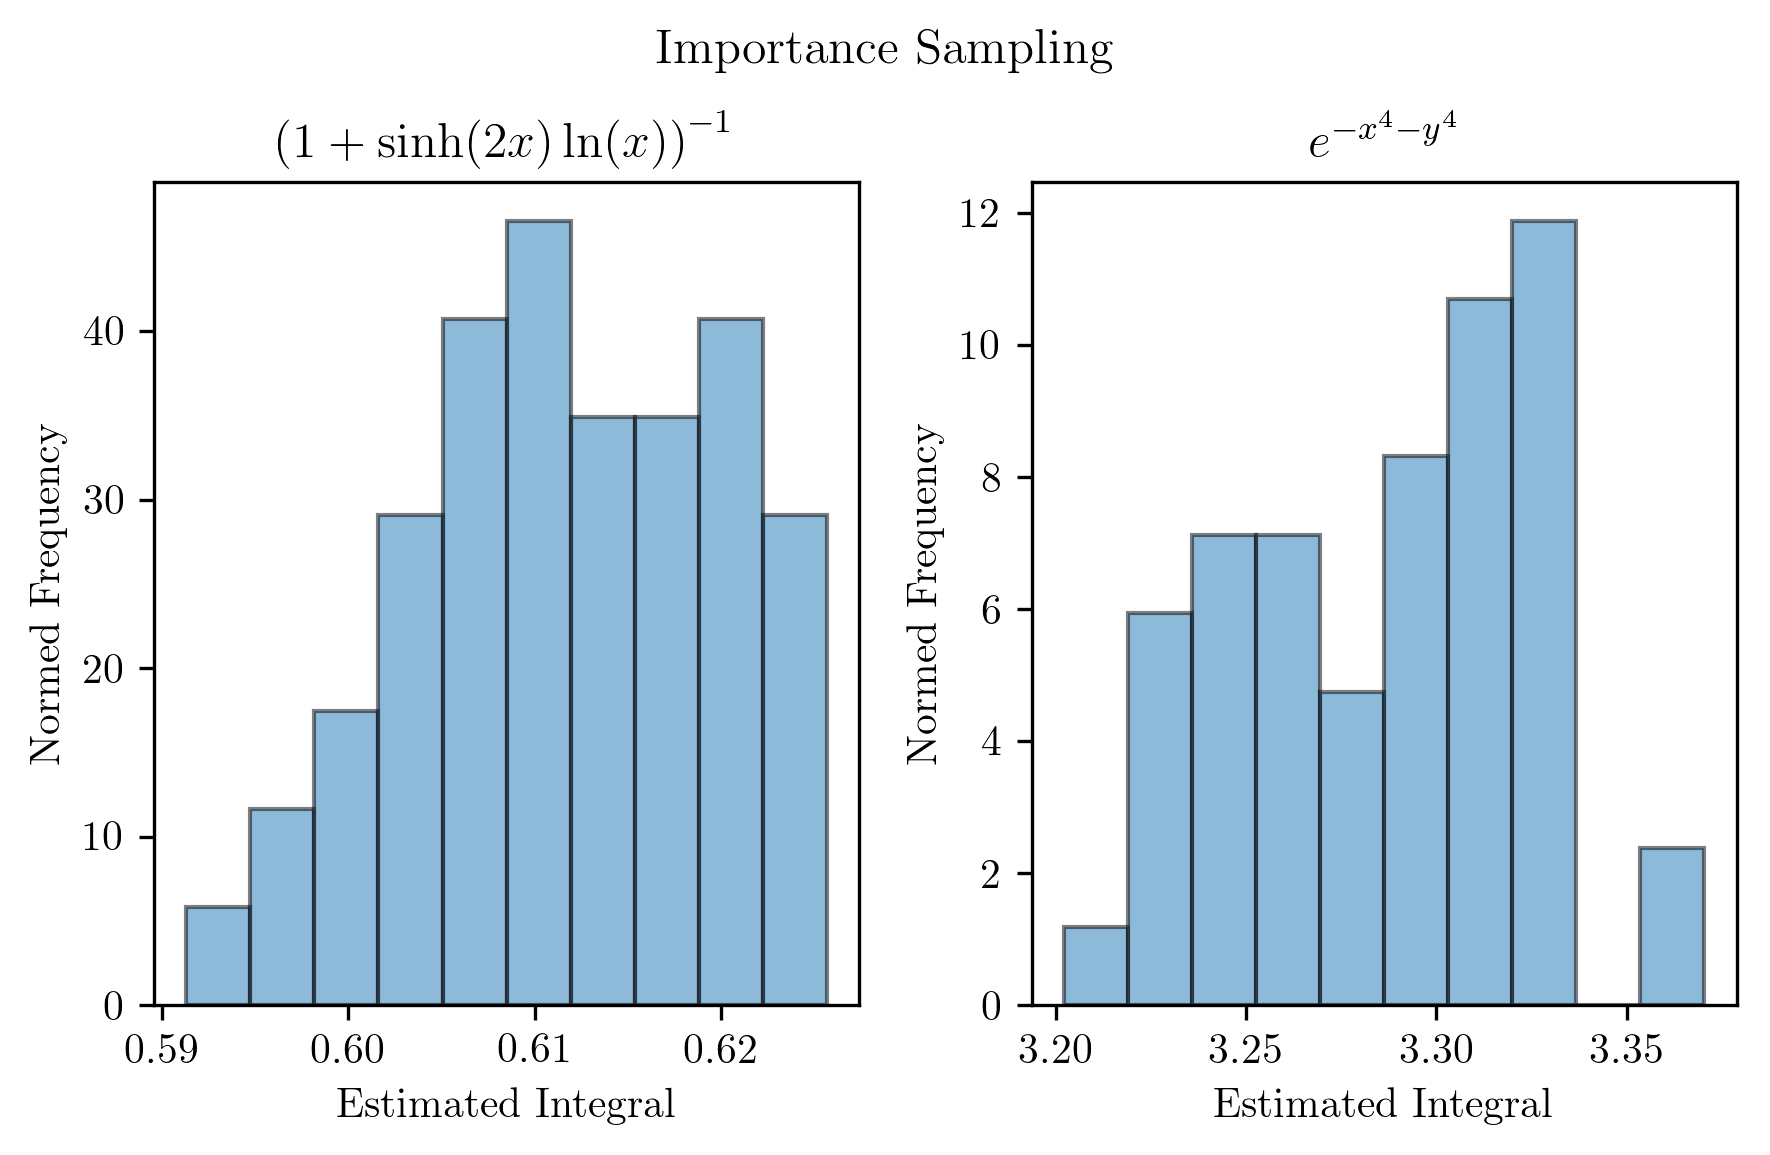

In [20]:
plt.figure(dpi=300)
plt.suptitle('Importance Sampling')

plt.subplot(121)
plt.hist(Integral4[:,0],rwidth = 1, edgecolor = 'black', \
        alpha = 0.5, label = '$Hist:\mathit{n=}300$',density = True) 
plt.ylabel('Normed Frequency')
plt.xlabel('Estimated Integral')
plt.title('${(1+\sinh(2x)\ln(x))}^{-1}$')

plt.subplot(122)
plt.hist(Integral4[:,1],rwidth = 1, edgecolor = 'black', \
        alpha = 0.5, label = '$Hist:\mathit{n=}300$',density = True) 
plt.ylabel('Normed Frequency')
plt.xlabel('Estimated Integral')
plt.title('${e}^{-x^4-y^4}$')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [22]:
print('Estimation of f1 is', np.mean(Integral4[:,0]))
print('Estimation of f2 is', np.mean(Integral4[:,1]))

Estimation of f1 is 0.611627607761
Estimation of f2 is 3.28695730104


### A Little Tail

Using general Monte Carlo Integration to estimate

$$f\left( x,y \right)=20+{{x}^{2}}+{{y}^{2}}-10\left( \cos \left( 2\pi x \right)+\cos \left( 2\pi y \right) \right),x,y\in \left[ -5,5 \right]$$

Calculate the exact integral.

In [35]:
def f3(x,y):
    return 20 + x**2 + y**2 -10*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y))

In [36]:
I3,err3=integrate.dblquad(f3,-5,5,lambda x:-5,lambda x:5)
print(I3)


3666.6666666666665


In [37]:
n5 = 1000
k5 = 50 
Samples5 = np.zeros([k5,n5,1])
Integral5 = np.zeros([k5,1])

for kk in range(k5):
    for i in range(n5):
        Samples5[kk,i,0] = f3(rand(1)*10-5,rand(1)*10-5)
    Integral5[kk,0] = np.mean(Samples5[kk,:,0]) * 100

In [40]:
print('Estimation of f(x,y) is', np.mean(Integral5[:,0]))

Estimation of f(x,y) is 3668.40997493


Perfect.